In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("/content/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [10]:
# Mapping ChestPainType
d = {'ATP': 0, 'NAP': 1, 'ASY': 2, 'ATA': 3, 'TA': 4}
df['ChestPainType'] = df['ChestPainType'].map(d).fillna(-1).astype(int)  # Filling unmapped values with -1

# Mapping ST_Slope
d = {'Up': 0, 'Flat': 1, 'Down': 2}
df['ST_Slope'] = df['ST_Slope'].map(d).fillna(-1).astype(int)

# Mapping RestingECG
d = {'Normal': 0, 'ST': 1}
df['RestingECG'] = df['RestingECG'].map(d).fillna(-1).astype(int)

# Mapping ExerciseAngina
d = {'N': 0, 'Y': 1}
df['ExerciseAngina'] = df['ExerciseAngina'].map(d).fillna(-1).astype(int)

# Mapping Sex
d = {'F': 0, 'M': 1}
df['Sex'] = df['Sex'].map(d).fillna(-1).astype(int)





In [11]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,3,140,289,0,0,172,0,0.0,0,0
1,49,0,1,160,180,0,0,156,0,1.0,1,1
2,37,1,3,130,283,0,1,98,0,0.0,0,0
3,48,0,2,138,214,0,0,108,1,1.5,1,1
4,54,1,1,150,195,0,0,122,0,0.0,0,0


In [12]:
df.shape

(918, 12)

In [13]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1]

In [14]:
X

array([[40. ,  1. ,  3. , ...,  0. ,  0. ,  0. ],
       [49. ,  0. ,  1. , ...,  0. ,  1. ,  1. ],
       [37. ,  1. ,  3. , ...,  0. ,  0. ,  0. ],
       ...,
       [57. ,  1. ,  2. , ...,  1. ,  1.2,  1. ],
       [57. ,  0. ,  3. , ...,  0. ,  0. ,  1. ],
       [38. ,  1. ,  1. , ...,  0. ,  0. ,  0. ]])

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[-1.4331398 ,  0.51595242,  1.19836252, ..., -0.8235563 ,
        -0.83243239, -1.05211381],
       [-0.47848359, -1.93816322, -1.37195709, ..., -0.8235563 ,
         0.10566353,  0.59607813],
       [-1.75135854,  0.51595242,  1.19836252, ..., -0.8235563 ,
        -0.83243239, -1.05211381],
       ...,
       [ 0.37009972,  0.51595242, -0.08679729, ...,  1.21424608,
         0.29328271,  0.59607813],
       [ 0.37009972, -1.93816322,  1.19836252, ..., -0.8235563 ,
        -0.83243239,  0.59607813],
       [-1.64528563,  0.51595242, -1.37195709, ..., -0.8235563 ,
        -0.83243239, -1.05211381]])

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=0)


In [ ]:
#from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression()


In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [18]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [19]:
rf.score(X_test,y_test)

0.8641304347826086

In [37]:
from sklearn.decomposition import PCA
pca = PCA(7)
X_pca = pca.fit_transform(X)
X_pca.shape

(918, 7)

In [38]:
pca.n_components_

7

In [40]:
X_train_pca,X_test_pca,y_train,y_test = train_test_split(X_pca,y,test_size=0.2,random_state=0)
model = RandomForestClassifier()
model.fit(X_train_pca,y_train)
model.score(X_test_pca,y_test)

0.7989130434782609

Mean of X1: 1.81, Mean of X2: 1.9100000000000001
Centered Data:
 [[ 0.69  0.49]
 [-1.31 -1.21]
 [ 0.39  0.99]
 [ 0.09  0.29]
 [ 1.29  1.09]
 [ 0.49  0.79]
 [ 0.19 -0.31]
 [-0.81 -0.81]
 [-0.31 -0.31]
 [-0.71 -1.01]]
Covariance Matrix:
 [[0.61655556 0.61544444]
 [0.61544444 0.71655556]]
Eigenvalues:
 [0.0490834  1.28402771]
Eigenvectors:
 [[-0.73517866 -0.6778734 ]
 [ 0.6778734  -0.73517866]]
Principal Component (Eigenvector corresponding to largest eigenvalue):
 [-0.6778734  -0.73517866]
Projected Data on Principal Component:
 [-0.82797019  1.77758033 -0.99219749 -0.27421042 -1.67580142 -0.9129491
  0.09910944  1.14457216  0.43804614  1.22382056]


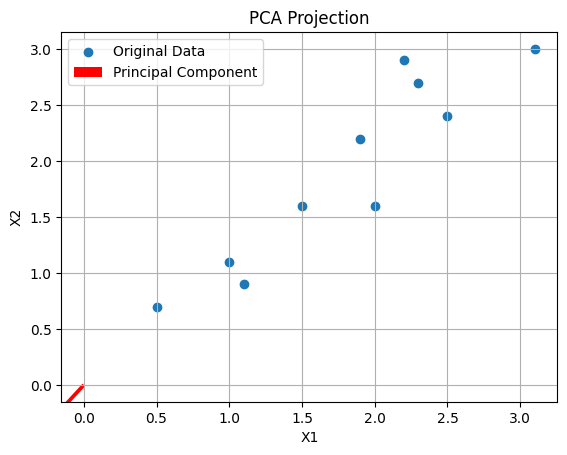

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Given data (X1 and X2)
data = np.array([[2.5, 2.4],
                 [0.5, 0.7],
                 [2.2, 2.9],
                 [1.9, 2.2],
                 [3.1, 3.0],
                 [2.3, 2.7],
                 [2.0, 1.6],
                 [1.0, 1.1],
                 [1.5, 1.6],
                 [1.1, 0.9]])

# Step 1: Compute the mean for each feature
mean_X1 = np.mean(data[:, 0])
mean_X2 = np.mean(data[:, 1])
print(f"Mean of X1: {mean_X1}, Mean of X2: {mean_X2}")

# Step 2: Center the data by subtracting the mean
centered_data = data - np.array([mean_X1, mean_X2])
print("Centered Data:\n", centered_data)

# Step 3: Compute the covariance matrix of the centered data
cov_matrix = np.cov(centered_data.T)
print("Covariance Matrix:\n", cov_matrix)

# Step 4: Calculate the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Step 5: Identify the principal components
principal_component = eigenvectors[:, np.argmax(eigenvalues)]
print("Principal Component (Eigenvector corresponding to largest eigenvalue):\n", principal_component)

# Step 6: Project the data onto the first principal component
projected_data = centered_data.dot(principal_component)
print("Projected Data on Principal Component:\n", projected_data)

# Optional: Visualize the projection on the first principal component
plt.scatter(data[:, 0], data[:, 1], label='Original Data')
plt.quiver(0, 0, principal_component[0], principal_component[1], color='r', scale=3, label='Principal Component')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('PCA Projection')
plt.legend()
plt.grid(True)
plt.show()
